<a href="https://colab.research.google.com/github/solharsh/Capstone_Sentiment_Analysis/blob/master/Classification_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
#import tokenization
import seaborn as sns
import matplotlib.pyplot as plt
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
import pickle
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP"
infile = open(DATA_PATH+'/df.pkl','rb')
df = pickle.load(infile)

In [8]:
df.head()

,Name,Date,Speech,Clean,Clean_english
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold


In [55]:
pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiment=[]
for sentence in df.Clean_english:
  sentiment.append(analyser.polarity_scores(sentence)['compound'])

df['sentiment_vadar']=sentiment

In [58]:
df

,Name,Date,Speech,Clean,Clean_english,sentiment_vadar
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union,0.0000
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave,-0.3818
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak,-0.0772
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...,-0.2023
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold,-0.6249
...,...,...,...,...,...,...
12311,Piyush Goyal,"February 1, 2019",Development has become a mass-movement during...,Development mass movement period Government,Development mass movement period Government,0.0000
12313,Piyush Goyal,"February 1, 2019",We will transform India into a leading nation...,transform leading nation world help people,transform leading nation world help people,0.4019
12314,Piyush Goyal,"February 1, 2019","We, along with them have laid the foundation",laid foundation,laid foundation,0.0000
12315,Piyush Goyal,"February 1, 2019",A grand edifice will be erected with their su...,grand edifice erected support,grand edifice support,0.6908


# Classification

In [0]:
df_selected = df[['Clean_english','sentiment_vadar']]

In [70]:
df_selected

,Clean_english,sentiment_vadar
0,rise Union,0.0000
1,interim regular economy grave,-0.3818
2,Growth business sentiment weak,-0.0772
3,economy capacity sustain high growth threat wi...,-0.2023
5,policy crisis eventually unfold,-0.6249
...,...,...
12311,Development mass movement period Government,0.0000
12313,transform leading nation world help people,0.4019
12314,laid foundation,0.0000
12315,grand edifice support,0.6908


In [71]:
df_selected["sentiment_vadar"] = df_selected["sentiment_vadar"].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df_selected

,Clean_english,sentiment_vadar
0,rise Union,0
1,interim regular economy grave,0
2,Growth business sentiment weak,0
3,economy capacity sustain high growth threat wi...,0
5,policy crisis eventually unfold,0
...,...,...
12311,Development mass movement period Government,0
12313,transform leading nation world help people,1
12314,laid foundation,0
12315,grand edifice support,1


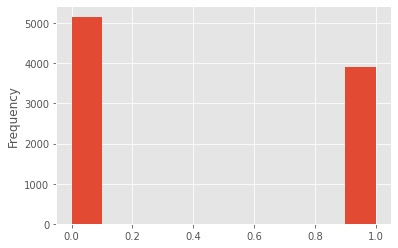

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

df_selected["sentiment_vadar"].plot.hist()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_selected[["Clean_english"]],
                                                  df_selected["sentiment_vadar"].tolist(),
                                                  test_size=0.10,
                                                  shuffle=True
                                                 )

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=50    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["Clean_english"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["Clean_english"].tolist())

In [82]:
print(tfidf_vectorizer.vocabulary_)

{'scheme': 43, 'additional': 0, 'system': 48, 'foreign': 20, 'propose': 38, 'crore': 7, 'current': 8, 'cent': 3, 'rate': 41, 'plan': 36, 'exemption': 16, 'education': 14, 'development': 11, 'government': 23, 'set': 47, 'sector': 45, 'policy': 37, 'public': 40, 'expenditure': 17, 'people': 35, 'growth': 24, 'tax': 49, 'rural': 42, 'service': 46, 'economy': 13, 'investment': 30, 'country': 5, 'provide': 39, 'capital': 2, 'duty': 12, 'increase': 28, 'order': 34, 'infrastructure': 29, 'income': 27, 'higher': 26, 'credit': 6, 'central': 4, 'basic': 1, 'excise': 15, 'national': 31, 'financial': 18, 'deduction': 10, 'fiscal': 19, 'custom': 9, 'number': 33, 'health': 25, 'section': 44, 'good': 22, 'need': 32, 'fund': 21}


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score
# To improve the performance of LogisticRegression we can tune its parameters, for example:
# * regularization type: penalty = {l1, l2, elasticnet}
# * regularization strength: C = {smaller values specify stronger regularization} 
#    !!! LogisticRegression regularized cost function: C*Cost(w) + penalty(w), 
# where w is the weights vector !!!
# * addressing class imbalance: 
# class_weight = {balanced or {class label:weight, class label:weight}, ...}
lrClassifier = LogisticRegression(penalty = 'l2',
                                  C = 0.1,
                                  class_weight = 'balanced')
lrClassifier.fit(X_train_text_vectors, y_train)
lrClassifier_val_predictions = lrClassifier.predict(X_val_text_vectors)
 
print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" % \
      (accuracy_score(y_val, lrClassifier_val_predictions), f1_score(y_val, lrClassifier_val_predictions)))

LogisticRegression on Validation: Accuracy Score: 0.656009, F1-score: 0.543860


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
 
# Calculate the precision and recall using different values for the classification threshold
val_predictions_probs = lrClassifier.predict_proba(X_val_text_vectors)
precisions, recalls, thresholds = precision_recall_curve(y_val, val_predictions_probs[:, 1])

Highest F1 score on Validation: 0.6130081300813008 , Threshold for the highest F1 score: 0.37092966705695507


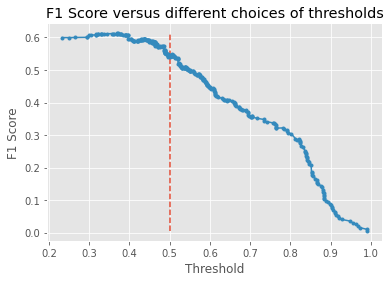

In [86]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# Calculate the F1 score using different values for the classification threshold, 
# and pick the threshold that resulted in the highest F1 score.
highest_f1 = 0
threshold_highest_f1 = 0
f1_scores = []
for id, threshold in enumerate(thresholds):

    f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
    f1_scores.append(f1_score)
    if(f1_score > highest_f1):
        highest_f1 = f1_score
        threshold_highest_f1 = threshold
print("Highest F1 score on Validation:", highest_f1, \
      ", Threshold for the highest F1 score:", threshold_highest_f1)
# Let's plot the F1 score versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(f1_scores), np.max(f1_scores)], linestyle='--')
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1 Score versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

# K Nearest Neighbors Model

In [0]:
#Let's get our binary vectors for the text field

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["Clean_english"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["Clean_english"].tolist())

In [88]:
print(tfidf_vectorizer.vocabulary_)

{'scheme': 164, 'encourage': 60, 'energy': 62, 'additional': 3, 'major': 113, 'include': 94, 'use': 191, 'technology': 186, 'system': 181, 'foreign': 77, 'level': 108, 'propose': 148, 'crore': 41, 'current': 42, 'coal': 28, 'power': 141, 'come': 29, 'cent': 24, 'effective': 57, 'rate': 155, 'making': 114, 'plan': 138, 'exemption': 68, 'limit': 111, 'education': 55, 'promote': 147, 'development': 48, 'sum': 179, 'purpose': 153, 'gain': 80, 'government': 83, 'set': 170, 'create': 38, 'sector': 166, 'policy': 139, 'providing': 150, 'banking': 12, 'public': 152, 'expenditure': 69, 'people': 134, 'creation': 39, 'economic': 53, 'growth': 85, 'net': 127, 'tax': 184, 'revenue': 161, 'rural': 163, 'digital': 49, 'employment': 58, 'value': 192, 'service': 169, 'place': 137, 'oil': 130, 'economy': 54, 'investment': 106, 'market': 118, 'world': 198, 'asset': 9, 'country': 37, 'taxation': 185, 'ministry': 121, 'provide': 149, 'information': 100, 'amend': 8, 'certain': 26, 'company': 32, 'start': 1

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [93]:
K_values = [3, 5, 10, 20, 30]
 
for K in K_values:
    knnClassifier = KNeighborsClassifier(n_neighbors=K)
    knnClassifier.fit(X_train_text_vectors, y_train)
    val_predictions = knnClassifier.predict(X_val_text_vectors)
    print("F1 Score for K:", K, "is", f1_score(y_val, val_predictions))

F1 Score for K: 3 is 0.5582922824302134
F1 Score for K: 5 is 0.5304054054054054
F1 Score for K: 10 is 0.4499054820415879
F1 Score for K: 20 is 0.3445378151260504
F1 Score for K: 30 is 0.2975929978118162
